In [ ]:
#Importações:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
## Covertype

from sklearn.datasets import fetch_covtype

cov = fetch_covtype(as_frame=True)
X = cov.data
y_mult = cov.target
y = (y_mult == 1).astype(int)  # 1 = Spruce/Fir

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
## Adult / Census Income

from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

X = df.drop(columns=["class"])
y = (df["class"] == ">50K").astype(int)

cat_cols = X.select_dtypes(include=["category", "object"]).columns
num_cols = X.select_dtypes(exclude=["category", "object"]).columns

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", num_cols)
])

X_proc = preprocess.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
pip install kagglehub

import kagglehub

# Baixa a versão mais recente do dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)


In [ ]:
## Credit Card Fraud
import os

csv_path = os.path.join(path, "creditcard.csv")

df = pd.read_csv(csv_path)  # caminho local
X = df.drop(columns=["Class"])
y = df["Class"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Credit Card Fraud (real Kaggle dataset):")
print("Amostras:", X.shape)
print("Fraudes:", y.sum(), "| Não-Fraudes:", (y == 0).sum())

Credit Card Fraud (real Kaggle dataset):
Amostras: (284807, 30)
Fraudes: 492 | Não-Fraudes: 284315


In [10]:
#Etapa 2 - Treinar os Modelos:

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    print(f"\n🔹 {nome}")
    print("Acurácia:", acc)
    print("ROC-AUC:", auc)
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

    resultados[nome] = {"acc": acc, "auc": auc, "cm": cm}

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression
Acurácia: 0.9991924440855307
ROC-AUC: 0.9356894910034015
Matriz de Confusão:
 [[85278    17]
 [   52    96]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.65      0.74       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443


🔹 SVM
Acurácia: 0.9982678510820079
ROC-AUC: 0.5189936199168862
Matriz de Confusão:
 [[85295     0]
 [  148     0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p


🔹 Decision Tree
Acurácia: 0.9990988144142879
ROC-AUC: 0.8410403559664947
Matriz de Confusão:
 [[85265    30]
 [   47   101]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.68      0.72       148

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443


🔹 KNN
Acurácia: 0.9983029622087239
ROC-AUC: 0.5931699285310283
Matriz de Confusão:
 [[85295     0]
 [  145     3]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.02      0.04       148

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.52     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
## Etapa 3 - Comparar Desempenho

df_result = pd.DataFrame(resultados).T
print("\nResumo de desempenho:")
print(df_result)


Resumo de desempenho:
                          acc       auc                        cm
Logistic Regression  0.999192  0.935689   [[85278, 17], [52, 96]]
SVM                  0.998268  0.518994    [[85295, 0], [148, 0]]
Decision Tree        0.999099   0.84104  [[85265, 30], [47, 101]]
KNN                  0.998303   0.59317    [[85295, 0], [145, 3]]


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


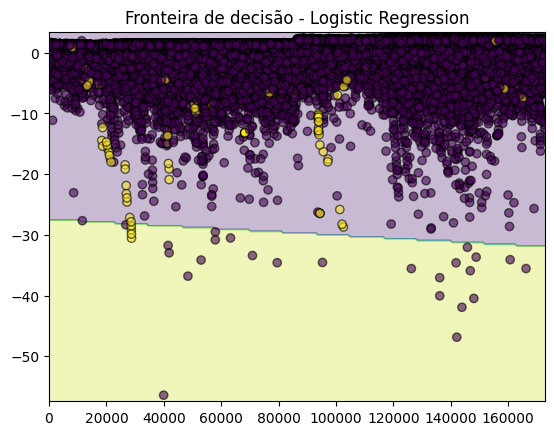

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


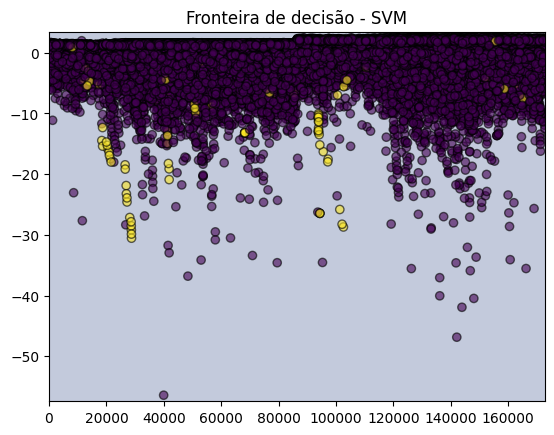

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


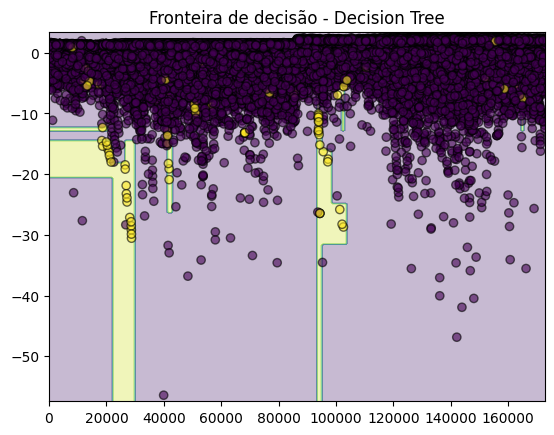

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


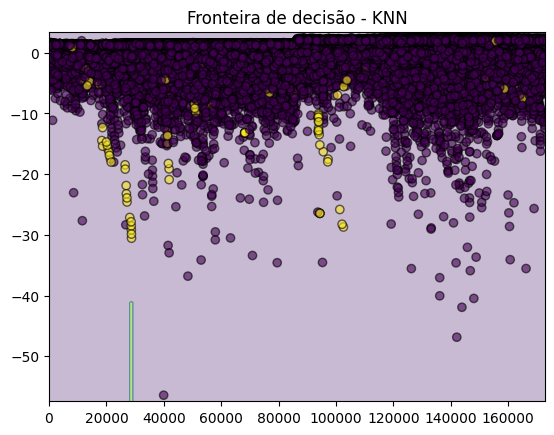

In [13]:
## Etapa 4 – Fronteiras de decisão (2 features)

# Seleciona duas features
X_vis = X_train.iloc[:, :2]  # usa .iloc para pegar as duas primeiras colunas
y_vis = y_train

for nome, modelo in modelos.items():
    modelo.fit(X_vis, y_vis)
    
    # Define limites do gráfico
    x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
    y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
    
    # Cria grade para visualização
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predição sobre a grade
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plota fronteira de decisão
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, edgecolor='k', alpha=0.6)
    plt.title(f"Fronteira de decisão - {nome}")
    plt.show()
